In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV # train test dataspilit

from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
# Reading the data
data = pd.read_csv("/content/household_power_consumption.txt", sep = ";")

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506120 entries, 0 to 506119
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   506120 non-null  object 
 1   Time                   506120 non-null  object 
 2   Global_active_power    506120 non-null  object 
 3   Global_reactive_power  506120 non-null  object 
 4   Voltage                506120 non-null  object 
 5   Global_intensity       506120 non-null  object 
 6   Sub_metering_1         506120 non-null  object 
 7   Sub_metering_2         506119 non-null  object 
 8   Sub_metering_3         502185 non-null  float64
dtypes: float64(1), object(8)
memory usage: 34.8+ MB


In [5]:
#combine date and time according to the formate
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
# droping the date and time as there's Datetime coulumn present
data.drop(columns=['Date', 'Time'], inplace=True)


In [ ]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2014221,1.798,0.158,238.100,7.600,0.000,1.000,18.0,2010-10-15 11:45:00
2014222,1.804,0.160,238.570,7.600,0.000,2.000,18.0,2010-10-15 11:46:00
2014223,1.806,0.160,238.750,7.600,0.000,1.000,18.0,2010-10-15 11:47:00
2014224,1.794,0.158,237.920,7.400,0.000,1.000,18.0,2010-10-15 11:48:00


In [7]:
data.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,1
Sub_metering_3,3935
DateTime,0


In [8]:
#Impuattion and EDA
data.fillna(0, inplace= True)

In [9]:
#Finding any value or cell is empty
data.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
DateTime,0


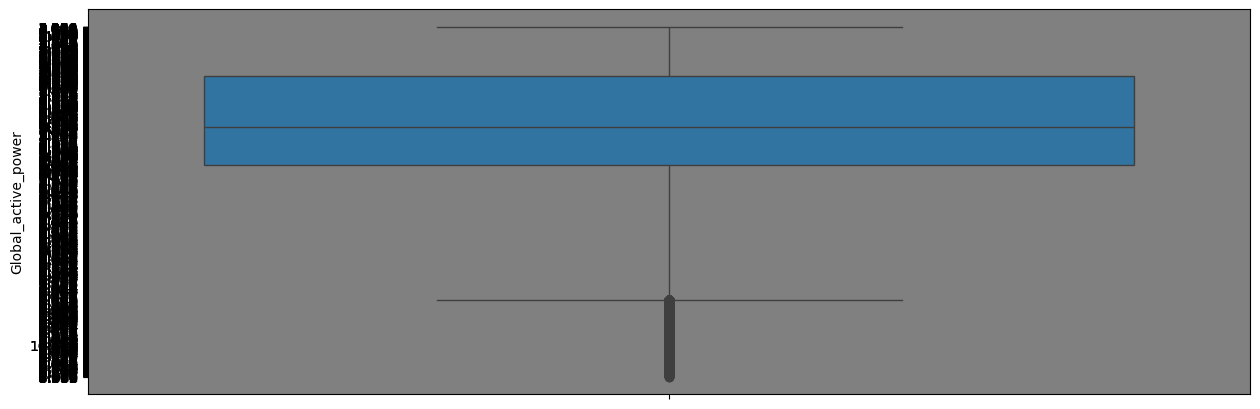

In [10]:
fig,axes = plt.subplots(figsize=(15,5))
axes.set_facecolor('grey')
sns.boxplot(data=data['Global_active_power'])
plt.show()
# sns.histplot(data['Global_active_power'], bins=50)
# plt.title("Global Active Power Distribution")
# plt.show()

In [11]:
# creating the features
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year
data['Weekday'] = data['DateTime'].dt.weekday

In [12]:
data['DateTime'] = pd.to_datetime(data['DateTime'])  # ensure it's datetime format
data = data.set_index('DateTime')  # set DateTime as index

In [ ]:
#data['date_only'] = data['DateTime'].dt.date

In [18]:
data['Daily_Avg_Power'] = data['Global_active_power'].rolling('1D').mean()

In [ ]:
#data['Power_avg'] = data['Global_active_power'].rolling(window=7).mean()

In [19]:
#converting objects to number to string
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].astype(str)

In [16]:
#converting objects to number
ed = LabelEncoder()
for i in data.select_dtypes(include='object').columns:
    data[i] = ed.fit_transform(data[i])
    print(i)

Global_active_power
Global_reactive_power
Voltage
Global_intensity
Sub_metering_1
Sub_metering_2


In [17]:
print(data.dtypes)

Global_active_power        int64
Global_reactive_power      int64
Voltage                    int64
Global_intensity           int64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3           float64
Hour                       int32
Day                        int32
Month                      int32
Year                       int32
Weekday                    int32
dtype: object


In [20]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Year,Weekday,Daily_Avg_Power
DateTime,,,,,,,,,,,,,
2006-12-16 17:24:00,2070,187,952,50,1,2,17.0,17,16,12,2006,5,2070.000000
2006-12-16 17:25:00,2642,196,831,78,1,2,16.0,17,16,12,2006,5,2356.000000
2006-12-16 17:26:00,2649,227,797,78,1,13,17.0,17,16,12,2006,5,2453.666667
2006-12-16 17:27:00,2656,229,842,78,1,2,17.0,17,16,12,2006,5,2504.250000
2006-12-16 17:28:00,1795,242,1036,37,1,2,17.0,17,16,12,2006,5,2362.400000


In [ ]:
#data['Power_avg'].head(9)

,Power_avg
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,2590.285714
7,2548.000000
8,2413.428571


In [21]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Day', 'Month', 'Year', 'Weekday',
       'Daily_Avg_Power'],
      dtype='object')

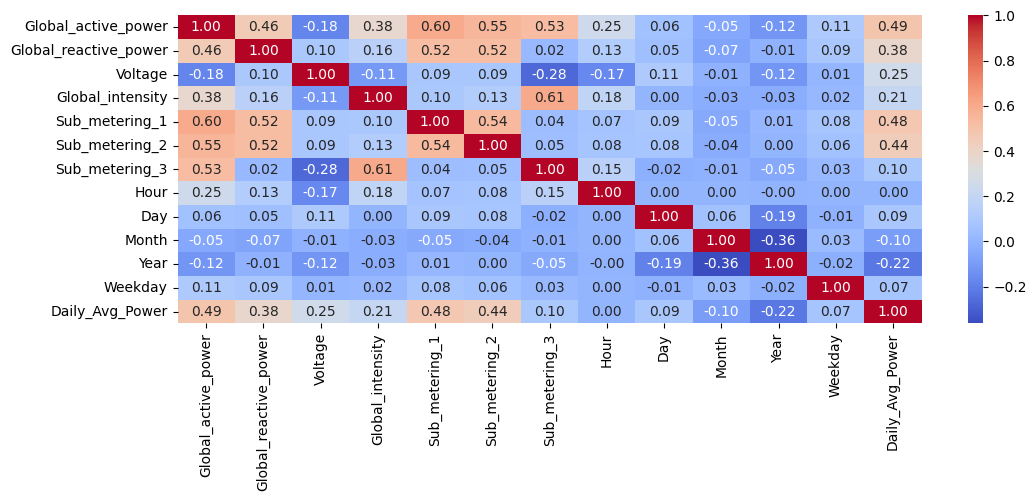

In [22]:
corr_data = data.corr()
plt.figure(figsize=(12,4))
sns.heatmap(corr_data, cmap='coolwarm', fmt='.2f', annot= True)
plt.show()

In [23]:
data['Global_active_power'].shape

(506120,)

In [67]:
mean_power = data['Global_active_power'].mean()
mean_power

np.float64(540.289472852288)

In [25]:
Column_to_drop = ['Sub_metering_2', 'Sub_metering_3']
data.drop(Column_to_drop, axis = 1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Hour,Day,Month,Year,Weekday,Daily_Avg_Power
DateTime,,,,,,,,,,,
2006-12-16 17:24:00,2070,187,952,50,1,17,16,12,2006,5,2070.000000
2006-12-16 17:25:00,2642,196,831,78,1,17,16,12,2006,5,2356.000000
2006-12-16 17:26:00,2649,227,797,78,1,17,16,12,2006,5,2453.666667
2006-12-16 17:27:00,2656,229,842,78,1,17,16,12,2006,5,2504.250000
2006-12-16 17:28:00,1795,242,1036,37,1,17,16,12,2006,5,2362.400000
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-03 04:39:00,191,21,1828,59,1,4,3,12,2007,0,849.078472
2007-12-03 04:40:00,177,0,1820,58,1,4,3,12,2007,0,848.812500
2007-12-03 04:41:00,156,0,1851,7,1,4,3,12,2007,0,848.531944


In [26]:
val = data.drop('Global_active_power', axis = 1)

tar = data['Global_active_power']

In [49]:
trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size= 0.20, random_state= 89)

In [50]:
rf_model = RandomForestRegressor(max_depth=6, max_features=9, max_samples=300,
                      n_estimators=500, random_state=89)

In [28]:
#rf_model = RandomForestRegressor(n_estimators=100, random_state=43)

In [51]:
rf_model

RandomForestRegressor(max_depth=6, max_features=9, max_samples=300,
                      n_estimators=500, random_state=89)

In [52]:
rf_model.fit(trdata, trlab)

RandomForestRegressor(max_depth=6, max_features=9, max_samples=300,
                      n_estimators=500, random_state=89)

In [53]:
tr_pred_rf = rf_model.predict(trdata) # Training predictin

ts_pred_rf = rf_model.predict(tsdata) #    test prediction


In [68]:
trlab.shape

(404896,)

In [69]:
tslab.shape

(101224,)

In [71]:
tsdata.shape

(101224, 12)

In [56]:
mean_squared_error(trlab, tr_pred_rf)

22535.899566462245

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
root_mean_squared_error(trlab, tr_pred_rf)

150.11961752703158

In [58]:
mean_squared_error(tslab, ts_pred_rf)

22425.00515176984

In [59]:
root_mean_squared_error(tslab, ts_pred_rf)

149.74980851997722

In [60]:
pred_data = pd.DataFrame({
    "actual": tslab,
    "pred": ts_pred_rf
})

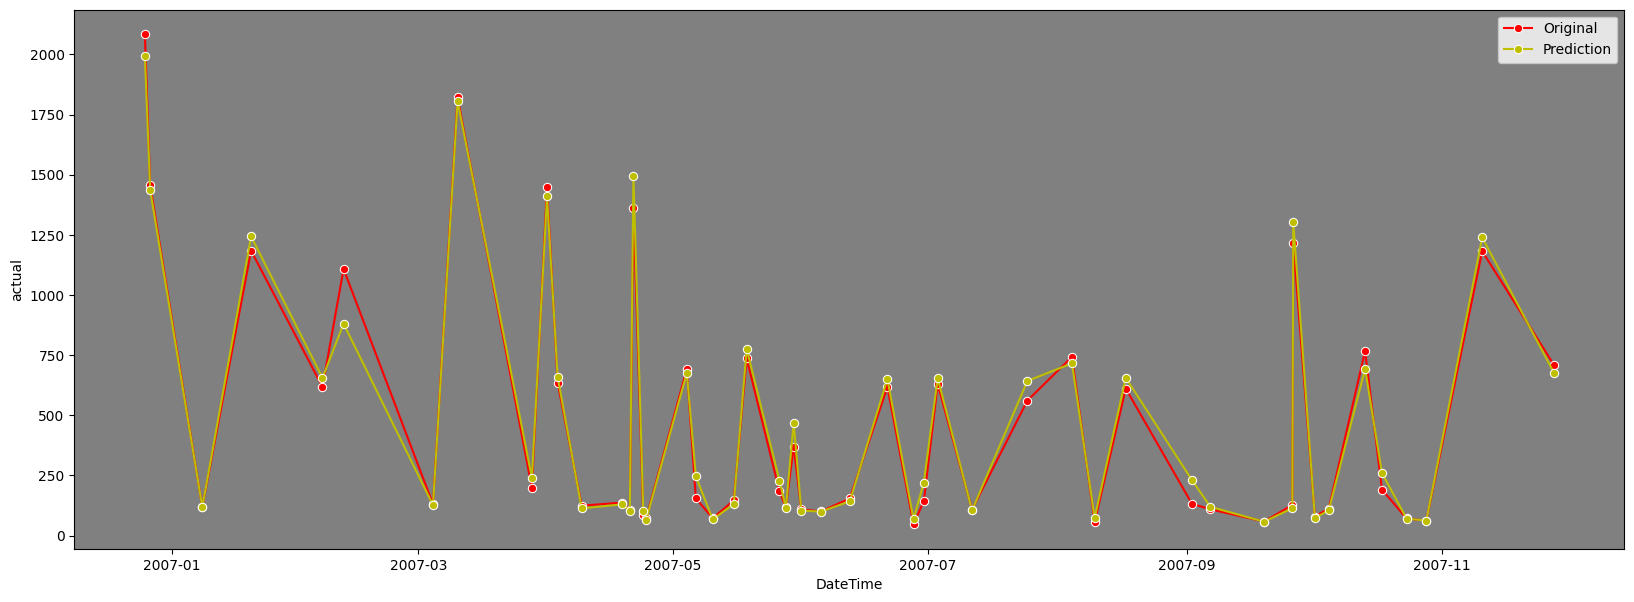

In [70]:
pred_data_20  = pred_data.head(50)

f, ax = plt.subplots(figsize= (20, 7))
ax.set_facecolor('Grey')

sns.lineplot(data = pred_data_20, x = pred_data_20.index, y = 'actual', marker = 'o', label = "Original", color = 'r')
sns.lineplot(data = pred_data_20, x = pred_data_20.index, y = 'pred', marker = 'o', label = "Prediction", color = 'y')

plt.legend()

plt.show()

In [40]:
Feature_Imp = pd.DataFrame({
    "actual": val.columns,
    "score" : rf_model.feature_importances_
}).sort_values('score', ascending = False)

In [41]:
Feature_Imp

,actual,score
2,Global_intensity,0.747563
3,Sub_metering_1,0.200568
4,Sub_metering_2,0.050439
1,Voltage,0.000552
0,Global_reactive_power,0.000246
11,Daily_Avg_Power,0.000176
5,Sub_metering_3,0.000121
6,Hour,0.000121
7,Day,0.000077
10,Weekday,0.000068


In [42]:
parameter = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [2,3,4,5,6],
    "max_samples": [50,100,200,300],
    "max_features": [3,5,7,9]
}

In [43]:
rf = RandomForestRegressor(random_state=89) # std model init

In [44]:
gs_model = GridSearchCV(rf, param_grid= parameter, cv = 5, scoring= "neg_root_mean_squared_log_error")

In [45]:
gs_model.fit(trdata, trlab)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=89),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [3, 5, 7, 9],
                         'max_samples': [50, 100, 200, 300],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='neg_root_mean_squared_log_error')

In [46]:
 gs_model.best_estimator_

RandomForestRegressor(max_depth=6, max_features=9, max_samples=300,
                      n_estimators=500, random_state=89)

In [47]:
gs_model.best_params_

{'max_depth': 6, 'max_features': 9, 'max_samples': 300, 'n_estimators': 500}

In [48]:
gs_model.best_score_

np.float64(-0.19497550287769252)